# Übung 1 Einlesen und Anzeigen der Datensätze

**German Traffic Sign Detection Benchmark**

Detallierte Beschreibung des Datensatzes siehe unter folgendem [Link](http://benchmark.ini.rub.de/?section=gtsdb&subsection=news)

## Imports

In [26]:
# Die folgenden Anweisungen müssen nur ein mal ausgeführt werden
!pip install -U -q ipywidgets #该模块中的interact函数可以和我们自定义的函数相结合，随着我们输入的不断变化，输出也会产生相应的不同结果，
!jupyter nbextension enable --py widgetsnbextension

ERROR: Invalid requirement: '#该模块中的interact函数可以和我们自定义的函数相结合，随着我们输入的不断变化，输出也会产生相应的不同结果，'
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [27]:
import os

import csv
import wget
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [28]:
# Testfunktion für ipywidgets: 
# Es soll ein Slider angezeigt werden. Der Wertebereich des Sliders
# soll zwischen -10(min) und 30(max) liegen. 
# Entsprechend der Sliderposition soll ein Ergebniswert angezeigt werden.
def f(x):
    return 3 * x
interact(f, x= 10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

## Verwendete  Module / Funktionen

In [29]:
# Definiere den Pfad zum heruntergeladenen Datenordner
path_to_data = r'C:\Users\hqpet\Desktop\BildAuto_Hausaufgabe\UE1\FullIJCNN2013\FullIJCNN2013'
# Prüfe, ob der Pfad existiert / korrekt eingegeben wurde
assert os.path.exists(path_to_data), "Der angegebene Pfad existriert nicht."#判断括号里的文件是否存在的意思，括号内的可以是文件路径。

Mache dich mit der Funktionsweise foldender Module / Funktionen vertraut.
Sie können zur Lösung der Aufgaben eingesetzt werden.
- os.path 
- os.listdir 返回指定的文件夹包含的文件或文件夹的名字的列表
- [csv.reader](https://docs.python.org/3/library/csv.html)
- string.split
- np.unique
- list.append
- plt.imread
- plt.imshow
- plt.show
- dict
- zip
- dict(zip())
- sorted
- cv2.rectangle
- cv2.putText
- dict.keys
- dict.values
- enumerate
- range
- interact

## Aufgabe 1 – Einlesen der "Ground Truth"-Textdatei

### Aufgabe 1.a
Lade den Datensatz herunter und entpacke ihn.
Unter folgendem [Link](https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/published-archive.html) kannst du die Kurzbeschreibung des Datensatzes einsehen.

In [30]:
# Es wird ein Weilchen dauern die Daten herunterzuladen (1,54GB)
# Nach dem erfolgreichen Herunterladen kann dieser Block auskommentiert werden
# url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
# wget.download(url)

In [31]:
# Um hartcodierte Namen in den Funktionen zu vermeiden, definiere an dieser Stelle 
# alle Variablen, die als Eingabeparameter der Funktionen verwendet werden
# gt_txt = os.path.dirname(os.path.realpath('C:/Users/hqpet/Desktop/BildAuto_Hausaufgabe/UE1/FullIJCNN2013/FullIJCNN2013/gt.txt'))
gt_txt = 'gt.txt'

### Aufgabe 1.c
Ermittle die Namen und die Anzahl der Bilder, die in der "Ground Truth"-Textdatei gt.txt nicht annotiert wurden.

Nützliche Funktionen:
- os.path
- [csv.reader](https://docs.python.org/3/library/csv.html)
- string.split
- len
- np.unique 该函数是去除数组中的重复数字,并进行排序之后输出。
- list.append
- range

In [32]:
def list_not_annotated_images(path_to_data_folder, gt_txt_file):
    """
        Liest Verkehrszeichendaten des German Traffic Sign Detection Benchmarks
        Argumente: Pfad zum heruntergeladenen Datenordner, gt.txt-Datei
        Rückgabe:  Liste mit den Namen der Bilder, die nicht annotiert wurden, 
                   Anzahl nicht annotierter Bilder
    """
    ###   TO DO   ###
    # Definiere den Pfad zur gt.txt
    txt_filepath = r'C:\Users\hqpet\Desktop\BildAuto_Hausaufgabe\UE1\FullIJCNN2013\FullIJCNN2013\gt.txt'
    
    assert os.path.exists(txt_filepath), "Der angegebene Pfad existriert nicht."
    
    # Definiere eine leere Liste für Bildnamen
    list_img_names = []
    
    # Öffne die gt.txt-Datei
    with open(txt_filepath, newline='') as csvfile:
        gt_reader = csv.reader(csvfile)
  
        # Bau eine Schleife, um die Daten Zeile für Zeile einzulesen und list_img_names zu füllen
        for row in gt_reader:
#             print(row)
            list_img_names.append(int((''.join(row)).split('.')[0])) # join() 方法用于将序列中的元素以指定的字符连接生成一个新的字符串。
#             list_img_names.append(row.split(";")[0])           
#     print(list_img_names)       
    # Entferne doppelte Einträge aus der Liste 删除列表中的重复条目 
    list_img_names = np.unique(list_img_names) #set()
#     print(list_img_names)
    # Ermittle, welche Bildnamen fehlen und mache daraus eine Liste 缺失的条目
    list_missing_names = [i for i in range(900) if i not in list_img_names]
    
    # Ermittle die Anzahl der fehlenden Bildnamen

    number_missing_img = len(list_missing_names)
    
    # Gebe folgendes aus: "In total XYZ images in the data folder are not annotated."
    # Anstelle von XYZ soll die Anzahl der nicht annotierten Bilder ausgegeben werden
    print(number_missing_img)
    
    return list_missing_names, number_missing_img

In [33]:
# Rufe die Funktion aus und prüfe, ob alles wie erwartet funktioniert
missing_img_list, missing_img_number = list_not_annotated_images(path_to_data, gt_txt)
# print(missing_img_list)
# print(missing_img_number)

159


### Aufgabe 1.d
Schreibe eine Funktion, die die gt.txt-Datei einliest und drei Listen zurückgibt:
- die Liste mit relativen Bildpfaden (strings),
- die Liste mit ClassIDs (integers)
- die Liste mit ROI-Koordinaten (integers)

Einzelne Schritte kannst du aus list_not_annotated_images-Funktion übernehmen.

In [34]:
def read_txt(path_to_data_folder, gt_txt_file):
    """
        Liest Verkehrszeichendaten des German Traffic Sign Detection Benchmarks
        Argumente: Pfad zum heruntergeladenen Datenordner
        Rückgabe:  Liste mit relativen Bildpfaden, Liste mit ClassIDs, Liste mit ROI-Koordinaten
    """
    ###   TO DO   ###
    # Definiere den Pfad zur gt.txt
    txt_filepath = r'C:\Users\hqpet\Desktop\BildAuto_Hausaufgabe\UE1\FullIJCNN2013\FullIJCNN2013\gt.txt'
    
    # Prüfe, ob der Pfad existiert / korrekt eingegeben wurde
    assert os.path.exists(txt_filepath), "Der angegebene Pfad existriert nicht."
    
    # Definiere leere Listen
    # Liste für Bildpfade
    img_paths_list = []
    
    # Liste für Class_IDs
    class_ids_list = []
    
    # Liste für ROIs //region of interesting Abrufen der Pixel-Koordinateninformationen der Region von Interesse (ROI)
    #检索感兴趣区域的像素坐标信息 
    rois_list = []
    
    # Öffne die gt.txt-Datei und ergänze den Code, um die entsprechenden Listen zu füllen
    with open(txt_filepath, newline='') as csvfile:
        gt_reader = csv.reader(csvfile)
        
        for row in gt_reader:
#             print(row)
            lst = (''.join(row)).split(';')#row.split(";")
            img_paths_list.append(os.path.join(path_to_data_folder,lst[0])) #os.path.join()：连接一个或多个路径组件。
            class_ids_list.append(int(lst[-1]))
            rois_list.append(list(map(int, lst[1:5])))#map() 会根据提供的函数对指定序列做映射。把字符串转换成int
                                  
    return img_paths_list, class_ids_list, rois_list

In [35]:
ppm_file_paths, class_ids, rois = read_txt(path_to_data, gt_txt)

Bildgröße (800, 1360, 3)
Class ID:  13


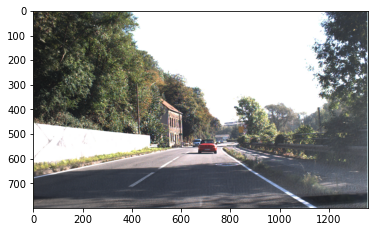

In [36]:
# Teste, ob die Bilder sich anzeigen lassen
# Nutze hier die Listen ppm_filenames, class_ids, die du mit read_txt berechnet hast
img = plt.imread(ppm_file_paths[100])
print("Bildgröße", img.shape)
print("Class ID: ", class_ids[100])
#mayplotlib RGB
plt.imshow(img)
# plt.imshow(img[:,:,::-1])翻转颜色通道
plt.show()
#opencv  BGR
# cv.imshow(img)
# cv.waitkey(0)
# cv.imwrite("name",img)

## Aufgabe 2 – Mapping ClassID – Bezeichnung der Verkehrsschilder
Generiere eine csv-Mapping-Datei aus ReadMe.txt. Nutze dafür alle dir zur Verfügung stehenden Mittel. Python Code ist für diese Aufgabe kein Muss. Die Datei soll das Mapping von Zahl zur Verkehrszeichenbezeichnung enthalten.
Schreibe eine Funktion, die zwei Rückgabewerte zurückgibt:
- pandas-DataFrame aus der generierten csv-Datei und
- eine Dictionary (dict) mit ClassIDs als *keys* und Verkehrsschilderbezeichnungen als *values*.

Nützliche Module / Funktionen:
- pd.read_csv
- os.path
- dict(zip())

In [37]:
###   TO DO   ###
# Generiere eine csv-Mapping-Datei und lege sie in den Datenordner ab
# Definiere die Variable csv_mapping, z.B.: 'tf_signs_mapping.csv' (entspricht dem Namen der generierten Datei)
csv_mapping = 'tf_signs_mapping.csv'

In [38]:
def map_int_to_sign_name(path_to_data_folder, csv_mapping_file):
    """
    Ordnet int-Zahl dem Schildnamen zu
    Argumente: Pfad zum Datenordner, Name der csv-Datei
    Rückgabe:  pandas-DataFrame aus der generierten csv-Datei und 
              eine Dictionary (dict) mit ClassIDs als keys und Traffic Sign Names als values
    """
    
    ###   TO DO   ###
    csv_path =  'C:/Users/hqpet/Desktop/BildAuto_Hausaufgabe/UE1/FullIJCNN2013/FullIJCNN2013/mapping.csv'
    
    assert os.path.exists(csv_path), "Der angegebene Pfad existriert nicht."
    # Lese die csv-Datei als DataFrame ein
    df = pd.read_csv(csv_path)
    
    # dict_mapping-Variable soll eine Dictionary (dict) sein, mit ClassIDs als keys und Traffic Sign Names als values
    dict_mapping = dict(zip(df['ClassID'],df['Traffic Sign Name'] )) 
    #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
    
    return dict_mapping, df

In [39]:
dict_mapping, df_map = map_int_to_sign_name(path_to_data, csv_mapping)

In [40]:
# Übersicht der Klassen
df_map.style.hide_index()

## Aufgabe 3 – Visualisierung der Verkehrszeichen
Schreibe eine Funktion, die ein Bild pro Klasse ausgibt. Verwende dafür die Bilder in den Unterordnern, die 
bereits nach **ClassID** genannt sind, um die Klassenzuordnung herzustellen. Für das Mapping verwende Variable **dict_mapping**, die in Aufgabe 2 berechnet wurde.

Nützliche Module / Funktionen:
- interact
- os.path
- list.append
- enumerate()多用于在for循环中得到计数，利用它可以同时获得索引和值，即需要index和value值的时候可以使用
- rjust() 返回一个原字符串右对齐,并使用空格填充至长度 width 的新字符串。如果指定的长度小于字符串的长度则返回原字符串。
- str.rjust(width[, fillchar]) width -- 指定填充指定字符后中字符串的总长度,fillchar -- 填充的字符，默认为空格。

In [41]:
def one_image_per_class(path_to_data_folder):
    """
    Gibt eine Liste mit je einem Bildpfad pro Klasse zurück
    Argumente: Pfad zum Datenordner
    Rückgabe: Liste mit Bildpfaden
    """
    ###   TO DO   ###
    # Definiere eine leere Liste für Bildpfade
    img_paths = []
    
    # Generiere eine Liste mit den Namen der Unterordner. Python os-Modul kann hier nützlich sein
    #生成一个带有子文件夹名称的列表。Python os模块在这里可以派上用场
    def f(i):
        return os.path.join(path_to_data_folder, str(i).rjust(2, '0')) 
    subfolders_paths = list(map(f, dict_mapping.keys()))
#     print(subfolders_paths)
    
    # Iteriere über die Unterordner-Pfade und speichere je ein Bildpfad aus den Unterordnern 
    #遍历子文件夹的路径，从每个子文件夹中保存一个图像路径 
    for path in subfolders_paths:
        assert os.path.exists(path), "Der angegebene Pfad existriert nicht."
        # Generiere einen gültigen Bildpfad
        img_path = os.path.join(path, '00000.ppm')
#         img_path = path + "/00001.ppm"
        assert os.path.exists(img_path), "Der angegebene Pfad existriert nicht."
        
        # Füge jeden Bildpfad der Liste img_paths hinzu 将每个图像路径添加到img_paths列表中
        img_paths.append(img_path)
        print(img_paths)
        
    return img_paths

In [42]:
img_paths_43_classes = one_image_per_class(path_to_data)

['C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\00\\00000.ppm']
['C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\00\\00000.ppm', 'C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\01\\00000.ppm']
['C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\00\\00000.ppm', 'C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\01\\00000.ppm', 'C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\02\\00000.ppm']
['C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\00\\00000.ppm', 'C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\01\\00000.ppm', 'C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\02\\00000.ppm', 'C:\\Users\\hqpet\\Desktop\\BildAuto_Hausaufgabe\\UE1\\FullIJCNN2013\\FullIJCNN2013\\03

In [43]:
def show_img_tr_sign(idx):
    ###   TO DO   ###
    # Definiere eine print()- Funktion deren Ausgabe folgende Form hat:
    # ClassID XY: dazu passende Bezeichnung
    # z.B.: ClassID 25:  construction (danger)
    print('ClassID',list(dict_mapping.keys())[idx],':',list(dict_mapping.values())[idx])
    
    plt.figure(figsize=(6,6))
    img = plt.imread(img_paths_43_classes[idx])
    plt.imshow(img)
    plt.show()

In [44]:
# Nutze interaktive Anzeige, um die Bilder anzusehen
interact(show_img_tr_sign, idx=widgets.IntSlider(min=0,max=len(img_paths_43_classes)-1,step=1, value=0));

interactive(children=(IntSlider(value=0, description='idx', max=42), Output()), _dom_classes=('widget-interact…

## Aufgabe 4 – Anzeige der ROIs (Regions of Interest)
Schreibe eine Funktion, um innerhalb der angezeigten Bilder die Verkehrsschilder zu markieren. Verwende dafür die Bilder im Hauptordner und die dazugehörige gt.txt. Bedenke, dass jedes Bild nur einmal angezeigt werden soll. 

Nützliche Module / Funktionen:
- dict(zip())
- cv2.rectangle
- cv2.putText 在图片上添加文字

In [52]:
def calc_rois(path_to_data_folder, csv_mapping_file, gt_txt_file):
    """
    Zeichnet ROIs und deren Bezeichnungen in die Bilder ein
    Argumente: Pfad zum heruntergeladenen Datenordner, Dateinamen
    Rückgabe:  Liste mit Bildern 
    """
    # Die Funktionen map_int_to_sign_name und read_txt sollten bereits implementiert sein  
    map_tr_sing_int, df_map = map_int_to_sign_name(path_to_data_folder, csv_mapping_file)
    ppm_filenames, class_ids, rois = read_txt(path_to_data_folder, gt_txt_file) 
#     print(ppm_filenames) .ppm文件的路径
    
    ###   TO DO   ###
    # Definiere eine leere Liste für die Speicherung von Bildern
    data = []
    # Definiere ein leeres Dictionary
    data_dict = {}
    
    curr_path = ""
    img = None
    counter_identical_path = 0
    # Bevor du weitermachst, versuche zu verstehen, was in if- und else-Blöcken der Schleife passiert
    #在你继续之前，试着理解在循环的if-和else-块中发生了什么
    for idx, file_path in enumerate(ppm_filenames):
#         print(idx)索引
        if curr_path != file_path: 
            curr_path = file_path
            # Lese ein Bild ein
            img = plt.imread(file_path)
            counter_identical_path = 1
            # Definiere Koordinaten für die Positionierung des Textfeldes mit Beschreibung des Verkehrszeichens
            #定义坐标，用于定位带有交通标志描述的文本字段
            initial_x_coordinate = 100
            initial_y_coordinate = 50
            # Bei dieser Variable handelt es sich um org-Parameter der cv2.putText
            org_id_meaning = (initial_x_coordinate, initial_y_coordinate)
        else:
            counter_identical_path += 1
            # Passe die x-Koordinate für jedes weitere Verkehrszeichen an
            # Folgende Zeilen sind eventuell optional 
            # Es hängt davon ab, wo du die Bezeichnung positionierst 
            initial_y_coordinate += 50
            org_id_meaning = (initial_x_coordinate, initial_y_coordinate)
        
        # Berechne Koordinaten des Rechtecks, benutze dafür die Variable rois
        point1 = (rois[idx][0],rois[idx][1]) 
        point2 = (rois[idx][2],rois[idx][3])
        
        # Zeichne das Rechteck mit Hilfe der berechneten Koordinaten in das Bild (cv2.rectangle) ein
        img =  cv2.rectangle(img, point1, point2, (0,0,255),5)
        
        # Ermittle Koordinaten für das Textfeld
        org = (rois[idx][2] + 10, rois[idx][1] + 20)
        # Speichere Verkehrszeichen-ID als string
        text = str(class_ids[idx])
        # Nutze cv2.putText um die Verkehrszeichen-ID neben dem entsprechenden Verkehrszeichen zu positionieren
        #使用cv2.putText将交通标志ID定位到相应的交通标志旁边。
        img = cv2.putText(img, text, org, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),5)
        # Speichere Verkehrszeichen-ID mit der dazugehörigen Bezeichnung als string
        text_id_meaning = ':'.join(map(str,list(map_tr_sing_int.items())[class_ids[idx]]))
#         print(map_tr_sing_int.items())全部遍历字典
        # Nutze cv2.putText um text_id_meaning im Bild zu positionieren
        img =  cv2.putText(img, text_id_meaning, org_id_meaning, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),5)
        # Füge jedes Bild der data-Liste hinzu
        data.append(img)
    
    # Benutze die Verkettung dict(zip()). Die Dictionary soll Pfadnamen als keys und Bilder als Dictionaries enthalten 
    data_dict = dict(zip(ppm_filenames, data))
    # Schpeichere die Bilder aus data_dict in die Liste
    data_list = list(data_dict.values())
    
    return data_list

In [53]:
data = calc_rois(path_to_data, csv_mapping, gt_txt)                                     

In [54]:
def show_img(idx):
    '''
    Helper-Funktion, die als erstes Parameter bei interact eingesetzt wird
    '''
    plt.figure(figsize=(16,8))
    plt.imshow(data[idx])
    plt.show()

In [48]:
interact(show_img, idx=widgets.IntSlider(min=0,max=len(data),step=1, value=0));

interactive(children=(IntSlider(value=0, description='idx', max=741), Output()), _dom_classes=('widget-interac…

## GESCHAFFT !!!